In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import OPTICS
from sklearn.metrics.cluster import rand_score, adjusted_rand_score ,v_measure_score
from sklearn.metrics import homogeneity_score, make_scorer
import collections

from data import *
from helpers import *


In [2]:
files = ['../labeled_dataset/GL53_UP_1A.csv',
         '../labeled_dataset/GL53_UP_2A.csv',
         '../labeled_dataset/GL53_UP_3A.csv',
         '../labeled_dataset/GL57_DN_3A.csv',
         '../labeled_dataset/GL57_DN_2A.csv',
         '../labeled_dataset/GL58_UP_1A.csv',
         '../labeled_dataset/GL58_UP_2A.csv',
         '../labeled_dataset/GL58_UP_3A.csv',
         '../labeled_dataset/GL59_DN_1A.csv',
         '../labeled_dataset/GL59_DN_2A.csv',
         '../labeled_dataset/GL59_DN_3A.csv']

file = '../labeled_dataset/GL53_UP_1A.csv'

columns=['B530-H','B675-H','B572-H','Width']

In [3]:
X,y = preprocess(file,columns)

## OPTICS

In [ ]:
grid_search_params = {"min_samples":[22,50,150,187,224,250],
                      "eps":[0.4,0.5,0.6,0.7,0.8,0.9,2],
                      "metric":["euclidean", "l2", "manhattan","chebyshev"],
                      "cluster_method":["dbscan","xi"]}
                    
            
min_samples_list = grid_search_params['min_samples']
eps_list = grid_search_params['eps']
metric_list = grid_search_params['metric']
cluster_method_list = grid_search_params['cluster_method']


means = []
maxs = []

for min_samples in min_samples_list:
    for eps in eps_list:
        for metric in metric_list:
            for cluster_method in cluster_method_list:

                result = []
                for file in files:
                    X,y = preprocess(file,columns)
                    dbscan = clusterDBSCAN(X,eps=eps, min_samples=min_samples,metric=metric, algorithm='auto')
            
                    ari = adjusted_rand_score(y,dbscan.labels_)
                    #v = v_measure_score(y,dbscan.labels_)
                    result.append(ari)
                max_ = max(result)
                maxs.append(max_)
                mean = np.mean(result)
                means.append(mean)

max_mean = max(means)
print(means.index(max_mean))


## DBSCAN

In [19]:
grid_search_params = {"min_samples":[50,150,187,188,224,225,250],
                      "eps":[0.4,0.5,0.6,0.7,0.8,0.9],
                      "metric":["euclidean", "l2", "manhattan","chebyshev"]}
                          #"cluster_method":["xi", "dbscan"],
                          #"algorithm":["auto", "ball_tree", "kd_tree", "brute"]}
            
min_samples_list = grid_search_params['min_samples']
eps_list = grid_search_params['eps']
metric_list = grid_search_params['metric']
all_params = []
for file in files:
    X,y = preprocess(file,columns)
    
    
    result = []
    for min_samples in min_samples_list:
        for eps in eps_list:
            for metric in metric_list:
                dbscan = clusterDBSCAN(X,eps=eps, min_samples=min_samples,metric=metric, algorithm='auto')
            
                ari = adjusted_rand_score(y,dbscan.labels_)
                v = v_measure_score(y,dbscan.labels_)
                result.append((ari,v))
    #print(result)
    max_ = max(result)
    #print(max(result))
    #print(result.index(max_))
    all_params.append(result.index(max_))

../labeled_dataset/GL53_UP_1A.csv
../labeled_dataset/GL53_UP_2A.csv
../labeled_dataset/GL53_UP_3A.csv
../labeled_dataset/GL57_DN_3A.csv
../labeled_dataset/GL57_DN_2A.csv
../labeled_dataset/GL58_UP_1A.csv
../labeled_dataset/GL58_UP_2A.csv
../labeled_dataset/GL58_UP_3A.csv
../labeled_dataset/GL59_DN_1A.csv
../labeled_dataset/GL59_DN_2A.csv
../labeled_dataset/GL59_DN_3A.csv


In [20]:
collections.Counter(all_params).most_common

<bound method Counter.most_common of Counter({38: 3, 14: 1, 27: 1, 32: 1, 142: 1, 78: 1, 6: 1, 66: 1, 62: 1})>

In [12]:
grid_search_params = {"min_samples":[30,50,90,150,170,187,188,224,225,250,300],
                      "eps":[0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                      "metric":["euclidean", "l2", "manhattan","chebyshev"]}           
min_samples_list = grid_search_params['min_samples']
eps_list = grid_search_params['eps']
metric_list = grid_search_params['metric']
min_samples_list

[30, 50, 90, 150, 170, 187, 188, 224, 225, 250, 300]

In [27]:
objective = 130
i = 1
for min_samples in min_samples_list:
    for eps in eps_list:
        for metric in metric_list:
            if i == objective:
                print(i)
                print("min_sample : " + str(min_samples))
                print("eps : " + str(eps))
                print("metric : " + metric)
                
            i = i+1

130
min_sample : 170
eps : 0.7
metric : l2


## DBSCAN v2

In [16]:
grid_search_params = {"min_samples":[30,50,60,70,90,150,170,187,188,224,225],
                      "eps":[0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                      "metric":["l2"]}
            
min_samples_list = grid_search_params['min_samples']
eps_list = grid_search_params['eps']
metric_list = grid_search_params['metric']
all_params = []

means = []

for min_samples in min_samples_list:
    for eps in eps_list:
        for metric in metric_list:
            result = []
            for file in files:
                X,y = preprocess(file,columns)
                dbscan = clusterDBSCAN(X,eps=eps, min_samples=min_samples,metric=metric, algorithm='auto')
            
                ari = adjusted_rand_score(y,dbscan.labels_)
                #v = v_measure_score(y,dbscan.labels_)
                result.append(ari)
            max_ = max(result)
            mean = np.mean(result)
            means.append(mean)

max_mean = max(means)
print(means.index(max_mean))


27


## Kmeans

In [21]:
all_k = []
for file in files:
    X,y = preprocess(file,columns)
    
    K = range(1,10)
    result = []
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(X)
        ari = adjusted_rand_score(y,km.labels_)
        v = v_measure_score(y,km.labels_)
        result.append((ari,v))
    print(result)
    max_ = max(result)
    print(max(result))
    print(result.index(max_))
    all_k.append(result.index(max_))

../labeled_dataset/GL53_UP_1A.csv
[(0.0, 3.2803337574986856e-16), (0.0014456031091511093, 0.0005018029536672513), (0.0007477234763752195, 0.00031258095417799694), (0.07170686610617114, 0.06958976307959283), (0.09980524986347819, 0.14124053703098305), (0.07160230066849609, 0.11691848386902903), (0.059979793356455154, 0.11733015911812872), (0.08643328336077855, 0.15823909545708972), (0.08389731988178521, 0.15241851387924465)]
(0.09980524986347819, 0.14124053703098305)
4
../labeled_dataset/GL53_UP_2A.csv
[(0.0, 0.0), (0.0312687834975498, 0.026417352609101424), (0.04017851371565656, 0.03612147763625912), (0.03131455146240006, 0.05611459590421283), (0.1073791903584922, 0.1588415931026529), (0.11620959192996083, 0.16280216296195343), (0.09578610494068039, 0.15230821141110784), (0.0837835009888291, 0.15946239325919007), (0.09346388480578197, 0.18101431013607255)]
(0.11620959192996083, 0.16280216296195343)
5
../labeled_dataset/GL53_UP_3A.csv
[(0.0, 1.127072667144196e-15), (0.010418826684601423

In [22]:
collections.Counter(all_k).most_common

<bound method Counter.most_common of Counter({2: 5, 4: 2, 5: 1, 3: 1, 1: 1, 6: 1})>

## DBSCAN

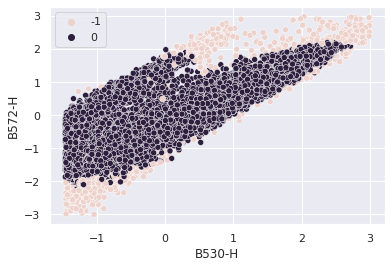

<AxesSubplot:xlabel='B530-H', ylabel='B572-H'>

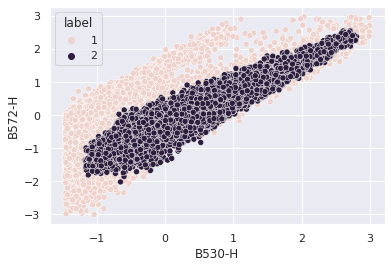

In [63]:
m = clusterDBSCAN(X,eps=0.6, min_samples=280,metric='euclidean', algorithm='auto')#unique, counts = np.unique(labels_density, return_counts=True)
#print(dict(zip(unique, counts)))
#plot_results(data, channels, assignments=labels_density)
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=m.labels_)
plt.show()
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=y)


In [64]:
base_opt = KMeans()
def score_func(y_true, y_pred, **kwargs):
    return adjusted_rand_score(y_true, y_pred)
scorer = make_scorer(score_func)

grid_search_params = {"n_clusters":np.arange(1,10)}

grid_search_cv = GridSearchCV(estimator=base_opt,
                                param_grid=grid_search_params,
                                scoring=scorer)

grid_search_cv.fit(X, y)

GridSearchCV(estimator=KMeans(),
             param_grid={'n_clusters': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring=make_scorer(score_func))

In [65]:
grid_search_cv.best_estimator_

KMeans(n_clusters=1)

In [ ]:
print(output_labels.shape)
print(X.shape)
print(y.shape)

In [ ]:
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=y)

In [ ]:
X = X.drop([0])
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=output_labels)

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(y.drop([0]), output_labels)

In [ ]:
#Files
file = '../labeled_dataset/GL53_UP_3A.csv'
columns=['FSC-H', 'SSC-H', 'B530-H', 'B572-H', 'B675-H']
df_labeled = pd.read_csv(file)

#creation of X and y
X,y = split_input_output(df_labeled,target_feature='label')

#Detect and remove outliers
X,y = remove_outliers(X,y,contamination=0.03)

#Standardize our data
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X[X.columns] = scaler.fit_transform(X[X.columns])

#Save file in csv format
save_to_csv(X,y)

In [ ]:
os.system("python ../FlowGrid/sample_code.py --f fc_data.csv --n 4 --eps 1.1")
output_labels = np.genfromtxt('fc_data_FlowGrid_label.csv', delimiter=',')


In [ ]:
#plot_results_b530_b572(X, columns, assignments=output_labels)
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=y)

In [ ]:
X = X.drop([0])
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=output_labels)

In [ ]:
#Files
file = '../labeled_dataset/GL55_DN_3A.csv'
columns=['FSC-H', 'SSC-H', 'B530-H', 'B572-H', 'B675-H']
df_labeled = pd.read_csv(file)

#creation of X and y
X,y = split_input_output(df_labeled,target_feature='label')

#Detect and remove outliers
X,y = remove_outliers(X,y,contamination=0.03)

#Standardize our data
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X[X.columns] = scaler.fit_transform(X[X.columns])

#Save file in csv format
save_to_csv(X,y)

In [ ]:
os.system("python ../FlowGrid/sample_code.py --f fc_data.csv --n 4 --eps 1.1")
output_labels = np.genfromtxt('fc_data_FlowGrid_label.csv', delimiter=',')

In [ ]:
#plot_results_b530_b572(X, columns, assignments=output_labels)

In [ ]:
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=y)

In [ ]:
X = X.drop([0])
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=output_labels)

## Automating the clustering and save outputs

In [ ]:
sns_plot.savefig("output.png")

# Older work without labeled dataset

## Clustering without labeled

In [ ]:
fc_data, channels = load_important_data('GL8_UP_1B.fcs','/../data/')

fc_data, tmp = standardize_log(fc_data)
fc_data, indices = remove_outliers_with_indices(fc_data, max_deviation = 4)

fc_subdata_array = np.array(fc_data)
np.savetxt("fc_data.csv", fc_subdata_array, delimiter=",")

os.system("python ../FlowGrid/sample_code.py --f fc_data.csv --n 2 --eps 1.1")

output_labels = np.genfromtxt('fc_data_FlowGrid_label.csv', delimiter=',')

fc_data = np.delete(fc_data, obj=0, axis=0)

plot_results_b530_b572(fc_data, channels, assignments=output_labels)

## Density gating

In [ ]:
#fc_data, channels = load_important_data('GL8_UP_1B.fcs')
s = FlowCal.io.FCSData('../data/GL8_UP_1B.fcs')
s = FlowCal.transform.to_rfi(s)
s_g1 = FlowCal.gate.high_low(s, channels=['B530-H','B572-H'])
FlowCal.plot.density2d(s_g1, channels=['B530-H','B572-H'], mode='scatter')
plt.show()

In [ ]:
s_g2 = FlowCal.gate.high_low(s_g1, channels='B530-H', low=25)
FlowCal.plot.density2d(s_g2, channels=['B530-H','B572-H'], mode='scatter')
plt.show()

In [ ]:
s_g4 = FlowCal.gate.density2d(s_g1,channels=['B530-H','B572-H'], gate_fraction=0.75)
FlowCal.plot.density2d(s_g4,channels=['B530-H','B572-H'],mode='scatter')
plt.show()

## Other clustering algo without labeled dataset

In [ ]:
fc_data, channels = load_important_data('GL9_DN_1A.fcs','/../data/')

fc_data, tmp = standardize_log(fc_data)
fc_data, indices = remove_outliers_with_indices(fc_data, max_deviation = 4)

fc_subdata_array = np.array(fc_data)
np.savetxt("fc_data.csv", fc_subdata_array, delimiter=",")

os.system("python ../FlowGrid/sample_code.py --f fc_data.csv --n 2 --eps 1.1")

output_labels = np.genfromtxt('fc_data_FlowGrid_label.csv', delimiter=',')

fc_data = np.delete(fc_data, obj=0, axis=0)

plot_results_b530_b572(fc_data, channels, assignments=output_labels)

In [ ]:
s = FlowCal.io.FCSData('../data/GL9_DN_1A.fcs')
s = FlowCal.transform.to_rfi(s)
s_g1 = FlowCal.gate.high_low(s, channels=['B530-H','B572-H'])

s_g4 = FlowCal.gate.density2d(s_g1,channels=['B530-H','B572-H'], gate_fraction=0.75)
FlowCal.plot.density2d(s_g4,channels=['B530-H','B572-H'],mode='scatter')
plt.show()

In [ ]:
fc_data, channels = load_important_data('GL11_UP_2A.fcs','/../data/')

fc_data, tmp = standardize_log(fc_data)
fc_data, indices = remove_outliers_with_indices(fc_data, max_deviation = 4)

fc_subdata_array = np.array(fc_data)
np.savetxt("fc_data.csv", fc_subdata_array, delimiter=",")

os.system("python ../FlowGrid/sample_code.py --f fc_data.csv --n 2 --eps 1.1")

output_labels = np.genfromtxt('fc_data_FlowGrid_label.csv', delimiter=',')

fc_data = np.delete(fc_data, obj=0, axis=0)

plot_results_b530_b572(fc_data, channels, assignments=output_labels)